In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data.csv')
df.head()

,label,left_x1,left_y1,left_z1,left_x2,left_y2,left_z2,left_x3,left_y3,left_z3,...,right_z18,right_x19,right_y19,right_z19,right_x20,right_y20,right_z20,right_x21,right_y21,right_z21
0,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(len(df))

18186


In [4]:
df = df.dropna(thresh=2).fillna(-2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17361 entries, 7 to 18185
Columns: 127 entries, label to right_z21
dtypes: float64(126), object(1)
memory usage: 17.0+ MB


In [6]:
df.describe()

,left_x1,left_y1,left_z1,left_x2,left_y2,left_z2,left_x3,left_y3,left_z3,left_x4,...,right_z18,right_x19,right_y19,right_z19,right_x20,right_y20,right_z20,right_x21,right_y21,right_z21
count,17361.000000,17361.000000,1.736100e+04,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,...,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000,17361.000000
mean,0.766912,0.676788,1.193939e-07,0.729372,0.648520,-0.012034,0.701646,0.600989,-0.019819,0.694463,...,-1.997858,-1.997404,-1.996898,-1.997864,-1.997416,-1.996895,-1.997860,-1.997427,-1.996890,-1.997858
std,0.048692,0.108049,2.867271e-07,0.050619,0.110116,0.011906,0.053514,0.110394,0.016514,0.053826,...,0.064729,0.078587,0.093865,0.064558,0.078228,0.093944,0.064675,0.077903,0.094106,0.064742
min,0.565271,0.270271,-1.101231e-06,0.518579,0.235082,-0.127155,0.482053,0.188528,-0.210590,0.470741,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.733463,0.610692,-3.144754e-08,0.695596,0.580807,-0.018141,0.667594,0.533616,-0.028089,0.664318,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
50%,0.764111,0.681741,1.506817e-07,0.726155,0.655669,-0.013704,0.698517,0.608330,-0.021659,0.690168,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
75%,0.794955,0.752260,3.299584e-07,0.757224,0.726518,-0.008407,0.731083,0.680104,-0.013041,0.723684,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
max,0.944528,1.030685,1.507549e-06,0.952791,1.016640,0.107877,0.949189,0.975636,0.141366,0.927259,...,0.021588,0.662201,1.075345,0.040290,0.655806,1.071280,0.049838,0.644609,1.071071,0.054056


In [7]:
features = df.drop(columns = ['label'])
label = df['label']

In [8]:
label_encoded = pd.get_dummies(label)
label_encoded

,A,B,C,One,eight,five,four,nine,seven,six,three,two,zero
7,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0
11,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18181,0,1,0,0,0,0,0,0,0,0,0,0,0
18182,0,1,0,0,0,0,0,0,0,0,0,0,0
18183,0,1,0,0,0,0,0,0,0,0,0,0,0
18184,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
features.values.shape

(17361, 126)

In [10]:
X_dev, X_test, y_dev, y_test = train_test_split(features.values, label, stratify=label, test_size=.1)

In [11]:
print(len(X_dev), len(y_dev))
print(len(X_test), len(y_test))

15624 15624
1737 1737


In [12]:
X_train, X_hyp, y_train, y_hyp = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=.1)

In [13]:
print('Train set: ', len(X_train), len(y_train))
print('Development set: ', len(X_hyp), len(y_hyp))
print('Test set: ', len(X_test), len(y_test))

Train set:  14061 14061
Development set:  1563 1563
Test set:  1737 1737


In [14]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs = -1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [16]:
from sklearn.metrics import confusion_matrix
y_true = y_hyp
y_pred = knn.predict(X_hyp)
y_proba = knn.predict_proba(X_hyp)
# print(y_proba)
print(confusion_matrix(y_true, y_pred))

[[ 91   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 121   0   0   0   4   1   0   0   0   0   0   0]
 [  0   0 132   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 154   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0 123   0   0   0   0   0   0   0]
 [  0   1   0   0   0   2 118   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 154   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  93   0   0   0   0]
 [  0   1   0   0   0   0   2   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  90   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1 123   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0  99]]


<AxesSubplot:>

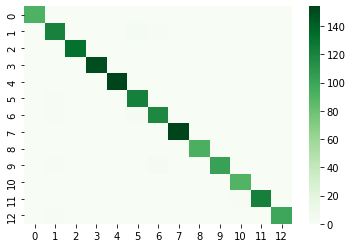

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Greens')

[[102   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   3   4   0   1   0   0   0   0]
 [  0   0 147   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 166   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0 169   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0 134   0   0   0   0   0   0   0]
 [  0   3   0   0   0   1 130   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0 171   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 103   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 115   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  99   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 137   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 111]]


<AxesSubplot:>

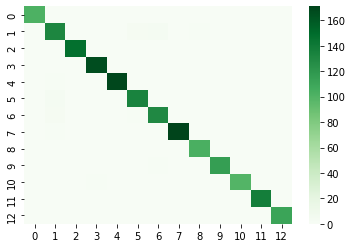

In [18]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_hyp)
# print(y_proba)
print(confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Greens')

In [19]:
knn.predict([X_test[0]])[0]

'five'

In [20]:
def testModel(model):
    import cv2
    import mediapipe as mp

    mp_holistic = mp.solutions.holistic
    mp_drawings = mp.solutions.drawing_utils
    mp_drawings_styles = mp.solutions.drawing_styles

    cap = cv2.VideoCapture(0)

    with mp_holistic.Holistic(
        min_detection_confidence = 0.5,
        min_tracking_confidence = 0.5) as holistic:

        left, right = None, None
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty frame")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = holistic.process(image)

            right = results.right_hand_landmarks
            left = results.left_hand_landmarks
            right_hand_marks = [-2]*63
            left_hand_marks = [-2]*63

            if right is not None:
                ind = 0
                for l in right.landmark:
                    right_hand_marks[ind], right_hand_marks[ind + 1], right_hand_marks[ind + 2] = l.x, l.y, l.z
                    ind += 3
            if left is not None:
                ind = 0
                for l in left.landmark:
                    left_hand_marks[ind], left_hand_marks[ind + 1], left_hand_marks[ind + 2] = l.x, l.y, l.z
                    ind += 3
            
            x = left_hand_marks + right_hand_marks
            isEmpty = all(i == -2 for i in x)
            if isEmpty:
                y = 'No Sign Detected'
            else:
                y = model.predict([x])[0]
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = True

            mp_drawings.draw_landmarks( image, 
                                            results.right_hand_landmarks,
                                            mp_holistic.HAND_CONNECTIONS,
                                            mp_drawings.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                            mp_drawings.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                    )
            mp_drawings.draw_landmarks( image, 
                                            results.left_hand_landmarks,
                                            mp_holistic.HAND_CONNECTIONS,
                                            mp_drawings.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                            mp_drawings.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                    )
            image = cv2.flip(image, 1)
            cv2.putText(image, y, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_4)
            cv2.imshow('Detection', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
testModel(knn)

In [54]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [55]:
y_train = [[i] for i in y_train.values]

AttributeError: 'list' object has no attribute 'values'

In [56]:
y_train_encoded = onehotencoder.fit_transform(y_train)
y_train_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [58]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train_encoded.toarray())

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
y_true = y_hyp
y_pred = dec_tree.predict(X_hyp)
y_proba = dec_tree.predict_proba(X_hyp)
print(y_pred)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
